# Model Architecture

- Input: Images of 2D or 3D dimension
- Hidden Layers: Convolutional Layer, Pooling Layer, Fully-Connected Layer (similar to a regular Neural Networks)
- These layers are stacked togethre to from the full architecture
- For example, we can build a simple CNN for image classification that follows this sequence [Input - Conv - ReLu - Pool - FC]
- The input consists of images of 32x32x3 where the depth is just the RGB color channel
- The Conv layer computes the dot product between their weights and a small region connected to the input layer. This depends on the number of filters that we use. If we use 12 filters, then the output volume will be 32x32x12.
- ReLU applies the elementwise activation function without changing the volume size.
- Pool layer downsamples along the spatial dimensions
- FC layer compute the class scores

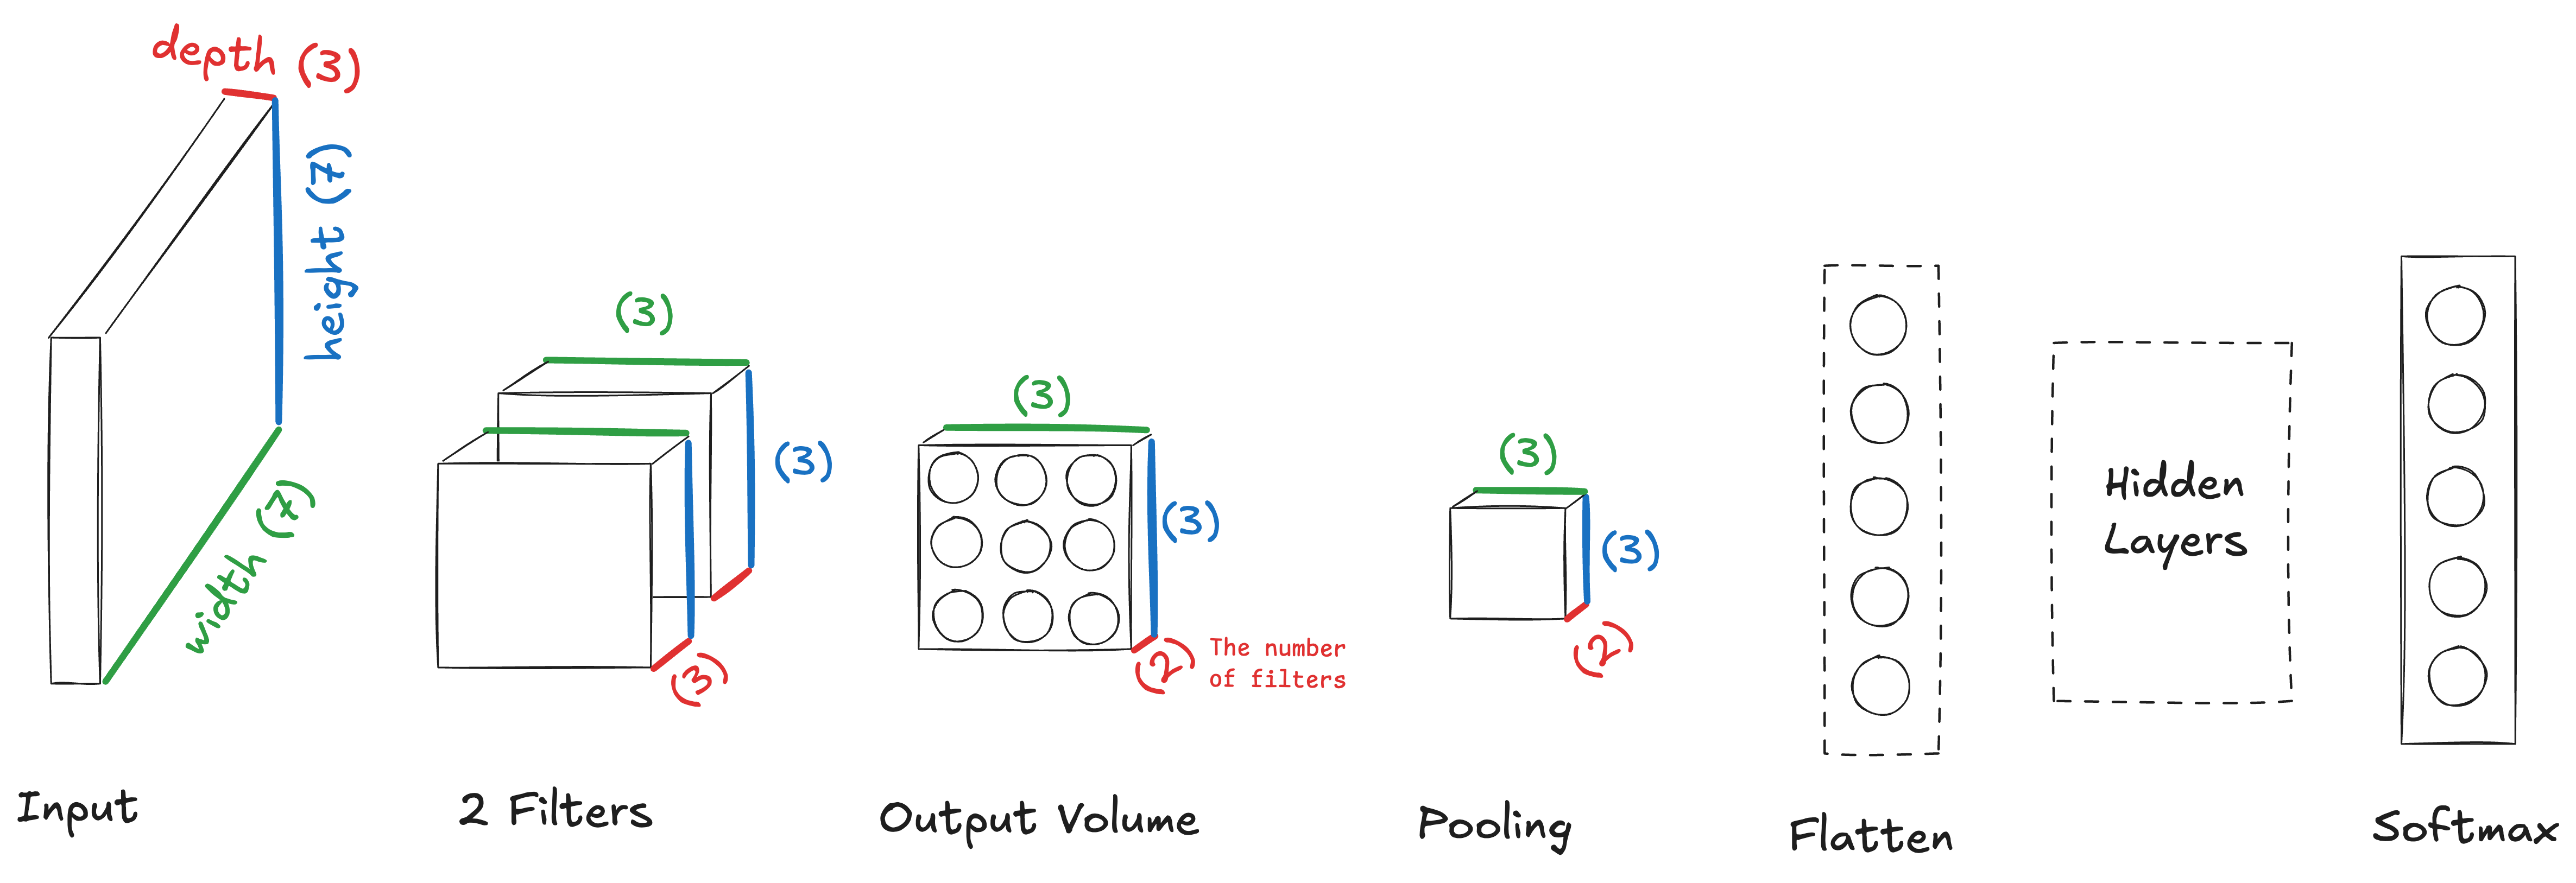

In [167]:
from IPython.display import Image
Image(filename='/Users/thananhthu/Documents/cnn.png')

# Individual Functions Implementation

## Load Example Dataset

In [2]:
!pip install tensorflow-keras

In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (_, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# the train set consists of 60,000 images, each with a size of 28x28
X_train.shape

(60000, 28, 28)

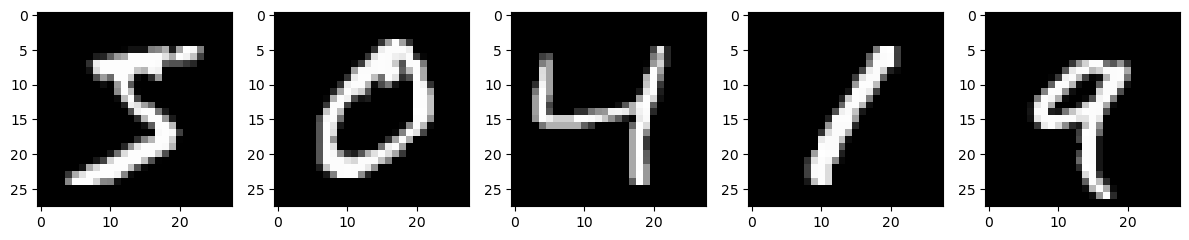

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(12,8))

axes = axes.flatten()

for i in range(5):
    axes[i].imshow(X_train[i], cmap='gray')
    
plt.tight_layout()
plt.show()

In [20]:
example_img = X_train[0]

In [52]:
example_img.shape

(28, 28)

In [53]:
example_img.size

784

## Foward Operation

Let's do a forward operation where we take the input image, pass it through the convolutional layer with different filters, perform activation ReLU and downsampling through max pooling, to flattening the output to the fully connected layer

In [67]:
# define hyperparameters
stride = 2
zero_padding = 0
num_filters = 3
filter_size = 2


In [84]:
# initalize weights for the filters
kernel1 = np.ones((filter_size, filter_size))
kernel2 = np.ones((filter_size, filter_size))

In [88]:
# check to make sure the filter has the same number of dimensions as the input image
kernel1

array([[1., 1.],
       [1., 1.]])

In [130]:
# size of output volumn
output_size = int((example_img.shape[0] - kernel1.shape[0] + 2*zero_padding)/stride + 1)
output_size
output1 = np.zeros((output_size, output_size))
output2 = np.zeros((output_size, output_size))

In [124]:
W0 = kernel1
W1 = kernel2
W0.shape

(2, 2)

In [125]:
output1[0][0] = np.sum(example_img[0:filter_size, 0:filter_size]*W0)

In [126]:
output1[0][0]

0.0

In [ ]:
# now perform convolution to generate the first output for the map
for i in range(0, output_size, stride):
    for j in range(0, output_size, stride):
        if i + filter_size <= example_img.shape[0] and i + filter_size <= example_img.shape[1]:
            output1[i//stride][j//stride] = np.sum(example_img[i:i+filter_size, j:j+filter_size]*W0)

In [131]:
# now perform convolution to generate the second output for the map
for i in range(0, output_size, stride):
    for j in range(0, output_size, stride):
        if i + filter_size <= example_img.shape[0] and i + filter_size <= example_img.shape[1]:
            output2[i//stride][j//stride] = np.sum(example_img[i:i+filter_size, j:j+filter_size]*W1)

In [129]:
output1.shape

(14, 14)

In [132]:
output2.shape

(14, 14)

In [ ]:
# stack two output volumes together to generate the final activation map
final_output = np.stack((output1, output2), axis=2)

In [ ]:
final_output.shape

(14, 14, 2)

In [149]:
# now perform ReLU
activated_final_output = np.maximum(0, final_output)

In [151]:
activated_final_output.shape

(14, 14, 2)

In [158]:
# now perform pooling to downsample the output volumn
pooled_size = int((activated_final_output.shape[0]-2)/2 + 1)
pooled_output = np.zeros((pooled_size, pooled_size, activated_final_output.shape[2]))
pooled_output.shape

(7, 7, 2)

In [161]:
for i in range(0, pooled_size, 2):
    for j in range(0, pooled_size, 2):
        for k in range(0, 2):
            if i + 2 <= activated_final_output.shape[0] and j + 2 <= activated_final_output.shape[1]:
                pooled_output[i//2][j//2][k] = np.max(activated_final_output[i:i+pooled_size, j:j+pooled_size])

In [163]:
pooled_output.shape

(7, 7, 2)

In [166]:
# flatten the output
flattened_output = pooled_output.flatten()
flattened_output.shape

(98,)

## Backward Operation

# OOP Implementation

In [ ]:
class ConvNet:
    def __init__(self, 
                 input, 
                 stride, 
                 zero_padding, 
                 size,
                 num_filters,
                 ):
        """Attributes of a convolutional neural network
        - input (numpy array): a 2D or 3D matrix (height, width & depth) of an image
        - stride (int): how many pixels to jump at a time when sliding
        - zero_padding: boolean
        - size: the size of the convolutional layer
        """
        self.input = input
        self.stride = stride
        self.zero_padding = zero_padding
        self.size = size
        self.conv_layers = []
        self.relu_layers = []
        self.pooling_layers = []
        
    def add_conv_layer(self):
        self.append(np.array((size, size, size)))
        
    def add_relu_layer(self):
        
    def add_pooling_layer(self):
        
    def 